# Aula 1 - Python em Aplicações ambientais

Importar pandas para ler o arquivo .CSV

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\marcos perrude\Documents\ENS410064\dados\PRcsv.csv", encoding='latin1')


In [15]:
df 

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia


In [16]:
df.dtypes

Ano          int64
Mes          int64
Dia          int64
Hora         int64
Minuto       int64
Estacao     object
Codigo      object
Poluente    object
Valor       object
Unidade     object
Tipo        object
Testacao    object
dtype: object

Transformar a coluna 'Valor' em Float e retirar as cedulas com 'insufic'

In [17]:
df['Valor'] = df['Valor'].replace(['insufic'], np.nan)
df['Valor'] = df['Valor'].astype('float')

In [18]:
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia


In [19]:
df.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [20]:
df.describe()

,Ano,Mes,Dia,Hora,Minuto,Valor
count,262110.0,262110.000000,262110.000000,262110.000000,262110.0,181817.000000
mean,2023.0,6.511617,15.680325,11.498684,0.0,12.651441
std,0.0,3.440920,8.772784,6.922897,0.0,16.180363
min,2023.0,1.000000,1.000000,0.000000,0.0,0.000000
25%,2023.0,4.000000,8.000000,5.000000,0.0,1.640000
50%,2023.0,7.000000,16.000000,11.000000,0.0,7.480000
75%,2023.0,10.000000,23.000000,17.000000,0.0,17.250000
max,2023.0,12.000000,31.000000,23.000000,0.0,239.630000


Perguntas : 
A - Qual a média da sua série de dados? r:  12.651441

B - Qual o valor do meio (percentil 50%)? r: 7,48

C- Qual a faixa de valores entre os percentis 25% e 75%? r: Faixa de valores de 1.64(25%) ate 17.25(75%)

Criando um Datetime com as colunas ano, mes, dia e hora

In [21]:
df['datetime'] = pd.to_datetime(df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')

In [22]:
df = df.set_index("datetime")

In [23]:
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 20:00:00,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
2023-12-30 21:00:00,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
2023-12-30 22:00:00,2023,12,30,22,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia


Filtrando apenas os poluentes da estação PR_012

In [24]:
df_PR012= df.query('Codigo == "PR_012"')

In [25]:
df_PR012

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 20:00:00,2023,12,30,20,0,CIC,PR_012,PM10,30.69,µg/m3,Automatico,referencia
2023-12-30 21:00:00,2023,12,30,21,0,CIC,PR_012,PM10,30.40,µg/m3,Automatico,referencia
2023-12-30 22:00:00,2023,12,30,22,0,CIC,PR_012,PM10,NaN,µg/m3,Automatico,referencia


In [28]:
df_PR012['Poluente']

<bound method Series.count of datetime
2023-01-01 00:00:00      CO
2023-01-01 01:00:00      CO
2023-01-01 02:00:00      CO
2023-01-01 03:00:00      CO
2023-01-01 04:00:00      CO
                       ... 
2023-12-30 20:00:00    PM10
2023-12-30 21:00:00    PM10
2023-12-30 22:00:00    PM10
2023-12-30 23:00:00    PM10
2023-12-31 00:00:00    PM10
Name: Poluente, Length: 34948, dtype: object>

In [41]:
d = df_PR012.groupby('Poluente').count()
print(d)

           Ano   Mes   Dia  Hora  Minuto  Estacao  Codigo  Valor  Unidade  \
Poluente                                                                    
CO        8737  8737  8737  8737    8737     8737    8737   7123     8737   
NO2       8737  8737  8737  8737    8737     8737    8737   7101     8737   
PM10      8737  8737  8737  8737    8737     8737    8737   6748     8737   
PM25      8737  8737  8737  8737    8737     8737    8737   7031     8737   

          Tipo  Testacao  
Poluente                  
CO        8737      8737  
NO2       8737      8737  
PM10      8737      8737  
PM25      8737      8737  


In [74]:
df_co = df_PR012.query('Poluente =="CO"')
df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')
df_co.head()

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia


In [61]:
df_pm10.head()

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,PM10,32.0,µg/m3,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,PM10,49.0,µg/m3,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,PM10,34.0,µg/m3,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,PM10,14.0,µg/m3,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,PM10,10.0,µg/m3,Automatico,referencia


In [77]:
df_co.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [79]:
df_co = df_co.groupby(['Ano', 'Mes', 'Dia']).mean()
df_co

TypeError: agg function failed [how->mean,dtype->object]

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_23464\2970735764.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


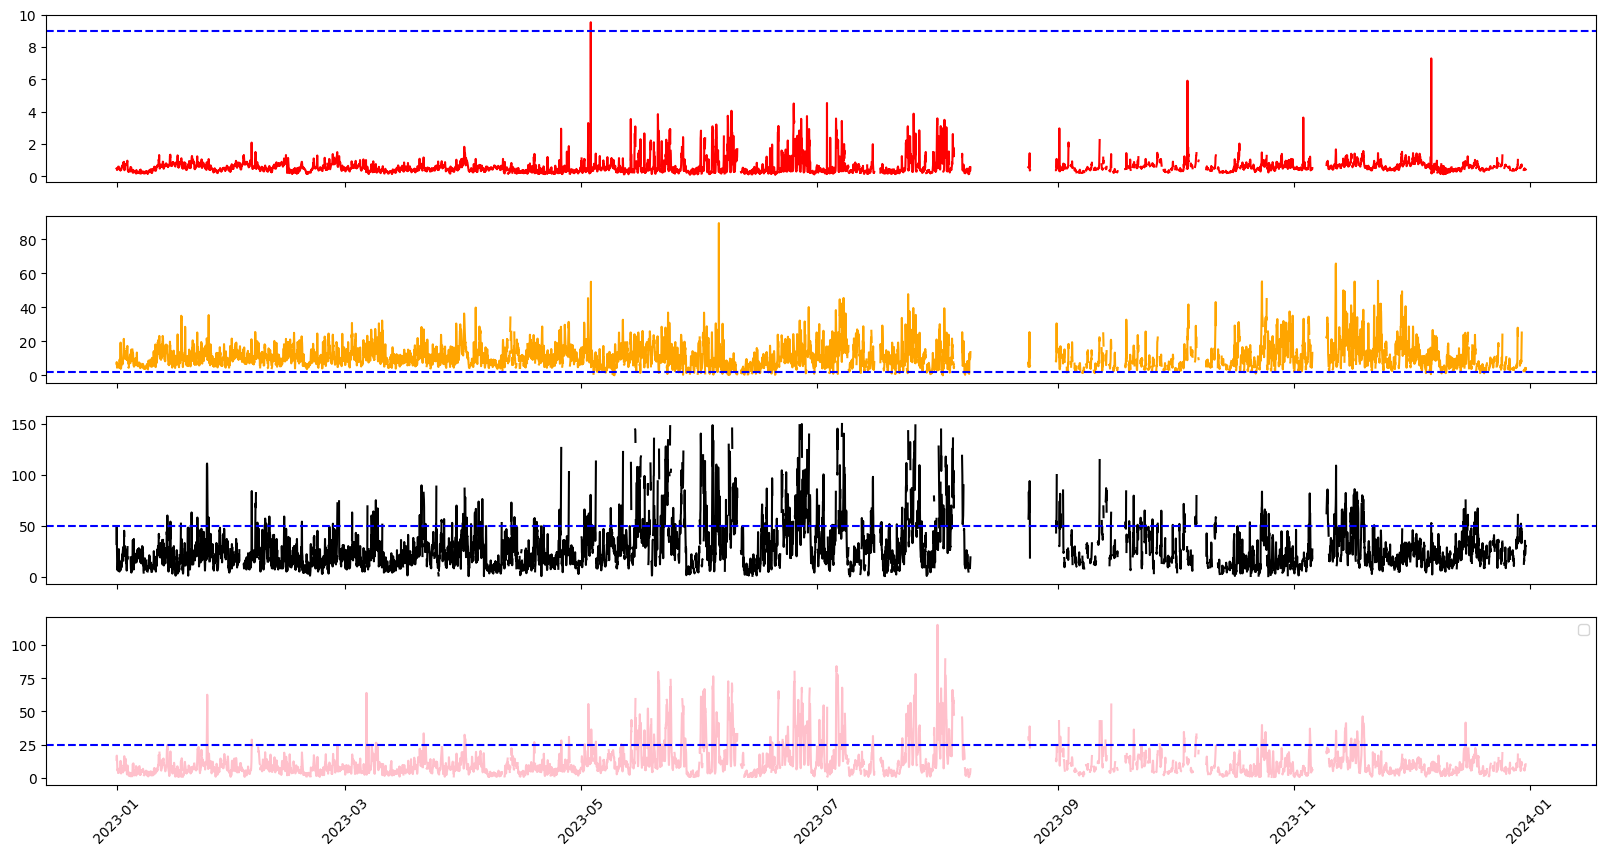

In [70]:

fig,ax = plt.subplots(4, 1,sharex=True,figsize = (20,10))
ax[0].plot(df_co.index,df_co['Valor'],color='red')
ax[1].plot(df_no2.index,df_no2['Valor'],color='orange')
ax[2].plot(df_pm10.index,df_pm10['Valor'],color='black')
ax[3].plot(df_PM25.index,df_PM25['Valor'],color='pink')
ax[3].tick_params(axis='x', rotation=45)

plt.legend()

ax[0].axhline(y= 9, color='blue', linestyle='--', label='Limite CO')
ax[1].axhline(y=2, color='blue', linestyle='--', label='Limite NO2')
ax[2].axhline(y=50, color='blue', linestyle='--', label='Limite PM10')
ax[3].axhline(y=25, color='blue', linestyle='--', label='Limite PM2.5')

In [30]:
df_co = df_PR012[df_PR012['Poluente'] == 'CO']

In [16]:
df_co


,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
218420,2023,12,30,20,0,SIX,PR_013,CO,0.54,ppm,Automatico,referencia
218421,2023,12,30,21,0,SIX,PR_013,CO,0.45,ppm,Automatico,referencia
218422,2023,12,30,22,0,SIX,PR_013,CO,NaN,ppm,Automatico,referencia
218423,2023,12,30,23,0,SIX,PR_013,CO,NaN,ppm,Automatico,referencia


Plotando o grafico de linha em comparação com o limite da CONAMA 491/2018 para CO

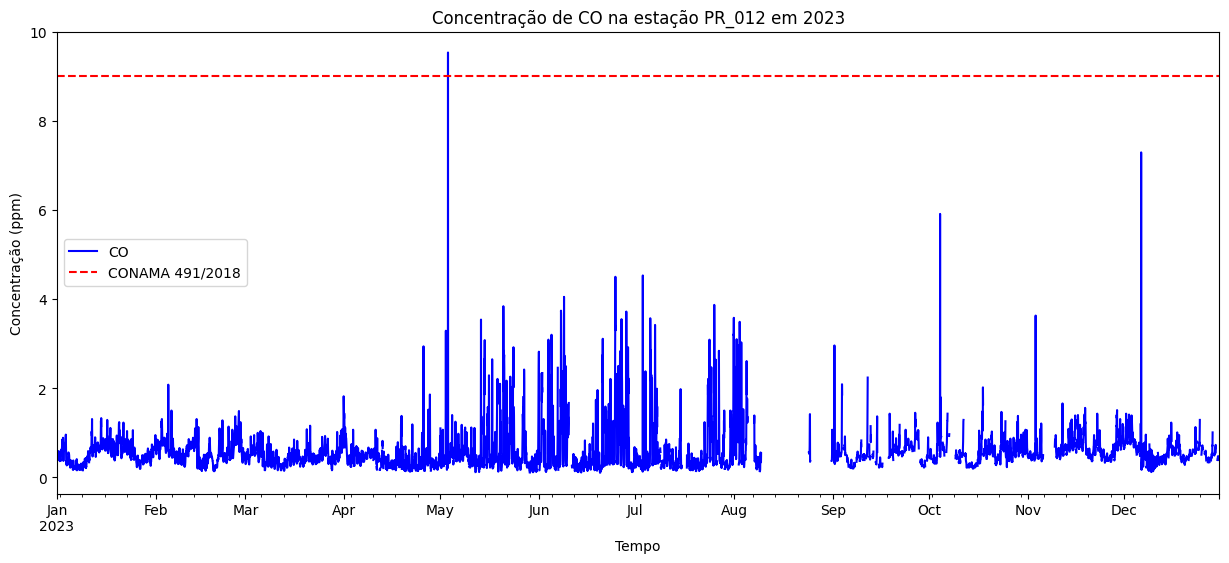

In [65]:
plt.figure(figsize=(15,6))
df_co['Valor'].plot(
     color = 'blue',
     legend = True ,
     xlabel = 'Tempo',
     ylabel = 'Concentração (ppm)',
     title = 'Concentração de CO na estação PR_012 em 2023',
     label= 'CO'
)
plt.axhline(y=9, color ='red', linestyle = '--', label = 'CONAMA 491/2018')
plt.legend()

In [37]:
df_co['Valor'].max()

np.float64(9.53)

In [9]:
df.groupby(by = ['Codigo'])[['Valor']].mean()

,Valor
Codigo,
PR_002,13.684943
PR_005,7.823165
PR_008,12.949507
PR_009,13.731484
PR_010,13.069958
PR_012,12.680549
PR_013,12.268745


In [75]:
df.groupby(by = ['Poluente'])[['Valor']].mean()

,Valor
Poluente,
CO,0.733944
NO2,12.074993
O3,17.584227
PM10,24.279240
PM25,11.515872
PTS,31.296220
SO2,4.298832


In [64]:
df.loc[df['Poluente'] =='SO2'] ['Valor']

datetime
2023-01-01 00:00:00    1.91
2023-01-01 01:00:00    1.86
2023-01-01 02:00:00    6.09
2023-01-01 03:00:00    2.31
2023-01-01 04:00:00    0.89
                       ... 
2023-12-30 20:00:00    2.88
2023-12-30 21:00:00    3.27
2023-12-30 22:00:00     NaN
2023-12-30 23:00:00     NaN
2023-12-31 00:00:00     NaN
Name: Valor, Length: 34948, dtype: float64